In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00


# Load Data


In [2]:
import pandas as pd
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = MNIST(root='.', download=True, train=True, transform=ToTensor())

images = dataset.data.numpy()
labels = dataset.targets.numpy()

flattened_images = images.reshape(images.shape[0], -1)


df = pd.DataFrame(flattened_images)
df['label'] = labels

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6032789.55it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 166596.56it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1293651.39it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 687496.53it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


# Task

Train RandomForest and Catboost for Label prediction.

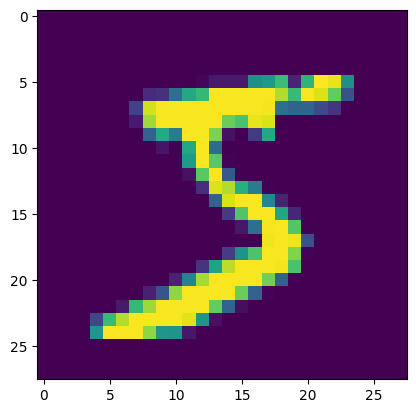

In [4]:
plt.imshow(np.array(df.iloc[0, :-1]).reshape(28, 28))

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
rfc= RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)


0.9665

In [9]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=df.label.unique(), columns=df.label.unique())

,5,0,4,1,9,2,3,6,7,8
5,1773,0,3,1,3,7,5,1,11,1
0,0,1962,14,5,4,0,2,3,1,3
4,4,5,1709,4,4,0,6,17,8,2
1,4,1,33,1740,1,21,1,17,17,11
9,2,1,1,1,1680,0,4,6,2,29
2,8,2,3,19,4,1586,12,2,11,6
3,4,1,1,0,5,13,1756,0,7,0
6,2,13,24,2,8,1,0,1868,4,15
7,1,8,13,11,16,16,5,2,1646,12
8,7,3,6,19,21,7,2,12,9,1677


In [10]:
from catboost import CatBoostClassifier

In [ ]:
cbc = CatBoostClassifier(verbose=True, iterations=100, random_seed=42, depth = 10, learning_rate=0.08) #verbose=True, depth,
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
accuracy_score(y_test, y_pred)